In [4]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [5]:
# read data
data = pd.read_csv('cdata.csv')

### (1) Randomly select data points as the initialized centroids.

### plot the process until convergence

C:\Users\vitus\AppData\Local\Temp\ipykernel_13064\4143228589.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_centroids.append([centroids.iloc[i][0], centroids.iloc[i][1], i])
C:\Users\vitus\AppData\Local\Temp\ipykernel_13064\4143228589.py:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(clusters[i][0], clusters[i][1], c=colors[clusters[i][2]])


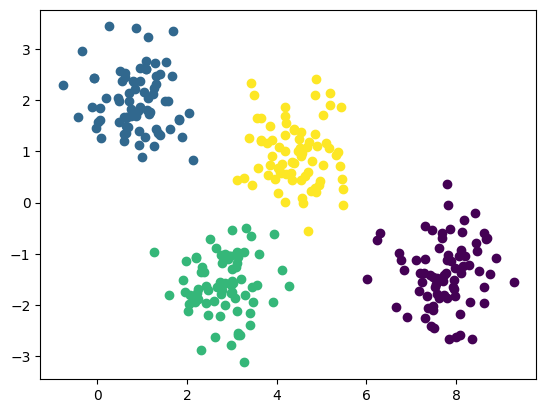

In [6]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def assign_clusters(data, centroids):
    clusters = []
    for i in range(data.shape[0]):
        distances = []
        for j in range(len(centroids)):
            distances.append(euclidean_distance(data.iloc[i][['x', 'y']], centroids[j][:2]))
        clusters.append([data.iloc[i]['x'], data.iloc[i]['y'], np.argmin(distances)])
    return clusters

def update_centroids(clusters, centroids):
    new_centroids = []
    for i in range(len(centroids)):
        # find all points in cluster i
        cluster = [x[:2] for x in clusters if x[2] == i]
        # print(cluster)
        if (len(cluster) == 0):
            new_centroids.append(centroids[i])
            return new_centroids
        cluster = pd.DataFrame(cluster)
        # print(cluster[0])
        new_centroids.append([np.mean(cluster[0]), np.mean(cluster[1]), i])
    return new_centroids
    
def random_centroids(data, k):
    centroids = data.sample(k).reset_index(drop=True)
    new_centroids = []
    for i in range(k):
        new_centroids.append([centroids.iloc[i][0], centroids.iloc[i][1], i])
    # print(new_centroids)
    return new_centroids

def kmeans(data, k, n_iter):
    centroids = random_centroids(data, k)
    for i in range(n_iter):
        clusters = assign_clusters(data, centroids)
        # if update_centroids(clusters, centroids) == None:
        #     clusters, centroids = kmeans(data, k, n_iter - i)
        centroids = update_centroids(clusters, centroids)
    return clusters, centroids

# Example usage
k = 4
clusters, centroids = kmeans(data, k, 10)
# use k of colors for k clusters
colors = cm.viridis(np.linspace(0, 1, k))
for i in range(len(clusters)):
    plt.scatter(clusters[i][0], clusters[i][1], c=colors[clusters[i][2]])
plt.show()

### (2)

C:\Users\vitus\AppData\Local\Temp\ipykernel_13064\4143228589.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_centroids.append([centroids.iloc[i][0], centroids.iloc[i][1], i])
C:\Users\vitus\AppData\Local\Temp\ipykernel_13064\4143228589.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_centroids.append([centroids.iloc[i][0], centroids.iloc[i][1], i])
C:\Users\vitus\AppData\Local\Temp\ipykernel_13064\4143228589.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

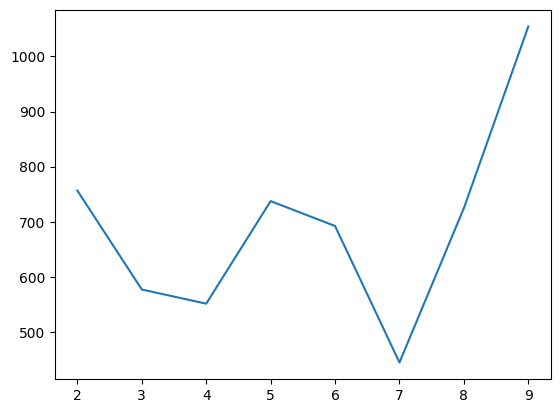

In [11]:
# calculate the sum of squared errors
def caculate_sse(data, clusters, centroids):
    sse = 0
    for i in range(len(clusters)):
        sse += euclidean_distance(data.iloc[i], centroids[clusters[i][2]])
    return sse

X = []
Y = []
for i in range(2, 10):
    clusters, centroids = kmeans(data, i, 5)
    X.append(i)
    Y.append(caculate_sse(data, clusters, centroids))
plt.plot(X, Y)
plt.show()